<a href="https://colab.research.google.com/github/Gitjesus22/Meta-gen-mica/blob/main/Analisis_de_diversidad_con_Ampvis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table><tr>
<td><img src="https://solariabiodata.com.mx/wp-content/uploads/2021/07/logo_red.png" alt="Soluciones de siguiente generacion" width=500/>
<td><img src="https://github.com/juan70804/contenido/blob/main/ampvis_logo02.png?raw=true" width=1300>
</tr></table>





# ¿Qué es Ampvis2?

Ampvis2 es un paquete de R para visualizar y analizar convenientemente los metadatos de nuestro interés. Es bastante útil a partir de la tabla de OTUs y otra de metadatos.

#Libreta con R para analisis de Diversidad con ampvis2

##Instalación de librerias 
Lo primero que vamos a instalar es la libreria ampvis2 desde su repositorio principal en Github:




In [ ]:
install.packages("remotes")
remotes::install_github("MadsAlbertsen/ampvis2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ampvis2' from a github remote, the SHA1 (5378c0f7) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
library(ampvis2)

In [ ]:
library(ggplot2)

### Formatos de la información de entrada

La información de la tabla de OTUs debe de estar separada por algún delimitador, ya sea por comas ****“,”**** o tabuladores ****“ “**** , pero principalmentedebe de contener al final las columnas de la taxonomía de cada OTU con un nombre concreto y los niveles clásicos en inglés, empezando por ****Kingdom**** . En esta práctica, la tabla de OTUs abarcará solamente 6 niveles, pero pueden ser hasta 7.

In [ ]:
data_level <- read.csv(file = "/content/sample_data/datos_level_6.csv")

In [ ]:
(data_level)

OTU,X085.01,X085.02,X085.03,Kingdom,Phylum,Class,Order,Family,Genus
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
OTU1,1249,25,5125,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Cetobacterium
OTU2,8346,0,0,Bacteria,Fusobacteriota,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,
OTU3,155,0,2730,Bacteria,Bacteroidota,Bacteroidia,NA,NA,Geobacillus
OTU4,0,0,2026,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Afipia
OTU5,560,0,1016,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Enhydrobacter
OTU6,0,0,1589,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,
OTU7,0,0,1126,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae.,
OTU8,0,1304,0,Bacteria,NA,NA,NA,,
OTU9,717,0,0,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,NA,Mitochondria


### Lista de metadatos 

La lista de metadatos será la siguiente:

In [ ]:
metadata_test <- read.table(file = "/content/sample_data/metadata_test.txt")

Warning message in read.table(file = "/content/sample_data/metadata_test.txt"):
“incomplete final line found by readTableHeader on '/content/sample_data/metadata_test.txt'”


In [ ]:
metadata_test

V1,V2
<chr>,<chr>
SampleID,TypeSample
085-01,suelo
085-02,agua
085-03,sedimento


Como te habrás dado cuenta, esta tabla de metadatos cumple con el mismo formato que en prácticas anteriores, donde su principal característica es que la informacion está separada mediante tabuladores.

### Creación de un objeto

Debemos crear un objeto con cualquier nombre, para esta práctica se llamará ****SOLARIA****. Este paso es fundamental para generar los análisis y visualizaciones.  

In [ ]:
SOLARIA <- amp_load(otutable ="/content/sample_data/datos_level_6.csv", metadata ="/content/sample_data/metadata_test.txt")
SOLARIA

ampvis2 object with 3 elements. 
Summary of OTU table:
     Samples         OTUs  Total#Reads    Min#Reads    Max#Reads Median#Reads 
           3           32        31421         1379        15351        14691 
   Avg#Reads 
    10473.67 

Assigned taxonomy:
   Kingdom     Phylum      Class      Order     Family      Genus    Species 
  32(100%) 30(93.75%) 30(93.75%)  28(87.5%) 25(78.12%) 17(53.12%)      0(0%) 

Metadata variables: 2 
 SampleID, TypeSample

Al cargar el ****objeto****, nos va a proporcionar los ****elementos**** que contiene, el cual resume la cantidad de lecturas y OTUs en las 3 muestras aplicadas, así como la ****taxonomía asignada**** y el número de variables identificados en el fichero de ****metadatos****.

# Generación de diferentes gráficas

### Curvas de rarefacción

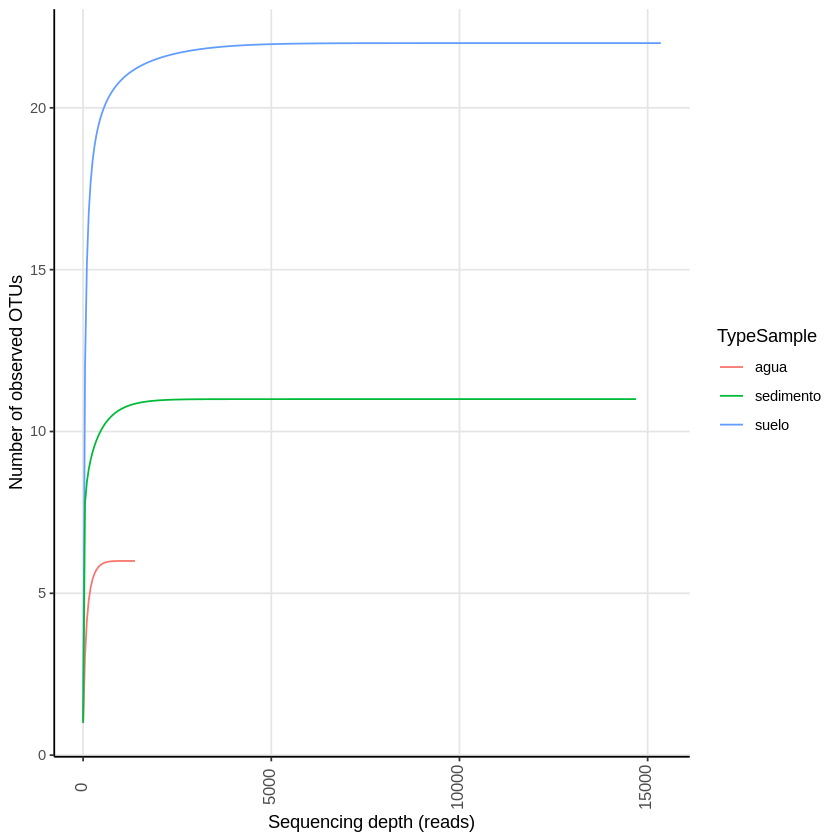

In [ ]:
amp_rarecurve(data = SOLARIA, stepsize = 50, color_by = "TypeSample")

Las curvas de rarefacción representan el número de especies frente al número de muestras. Este tipo de curvas se crea volviendo a muestrear aleatoriamente el conjunto de “n” muestras varias veces y luego trazando el número promedio de especies encontradas en cada muestra. Se espera que cada curva generada obtenga un comportamiento “asintótico”.

#Gráfica de Boxplot 

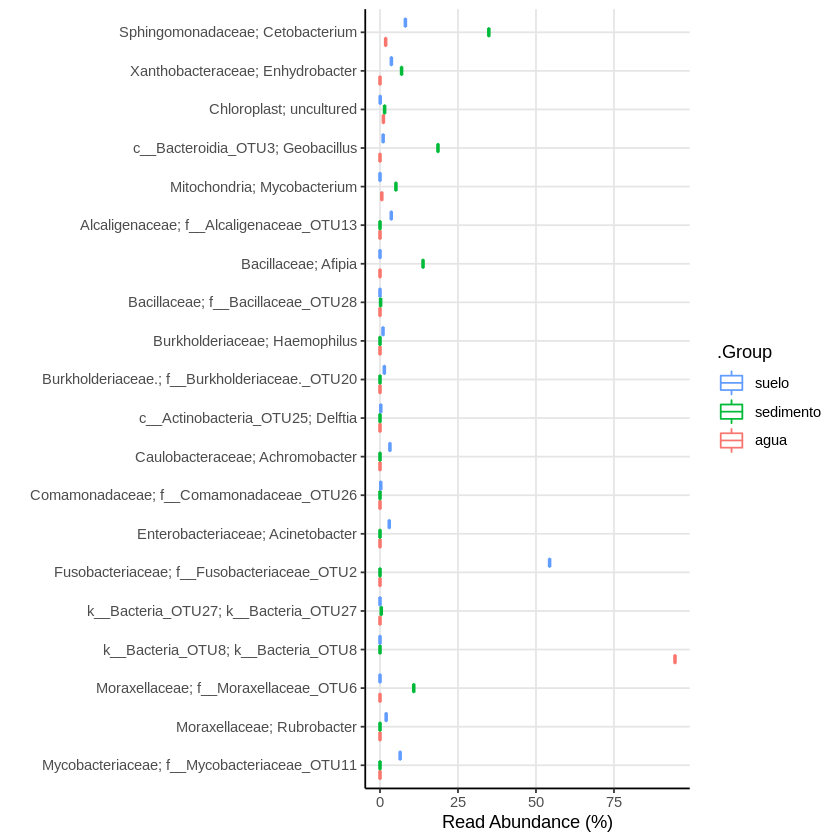

In [ ]:
amp_boxplot(data = SOLARIA, group_by = "TypeSample", tax_add = "Family")

En este tipo de gráficos se puede analizar mejor el porcentaje de abundancia ubicado en el eje de las ****x**** con base a los ****3 grupos**** dados para esta visualización en relación con las ****familias**** representadas en cada muestra significativa.

#Heatmap o Mapa de Calor 

Warning message:
“Transformation introduced infinite values in discrete y-axis”


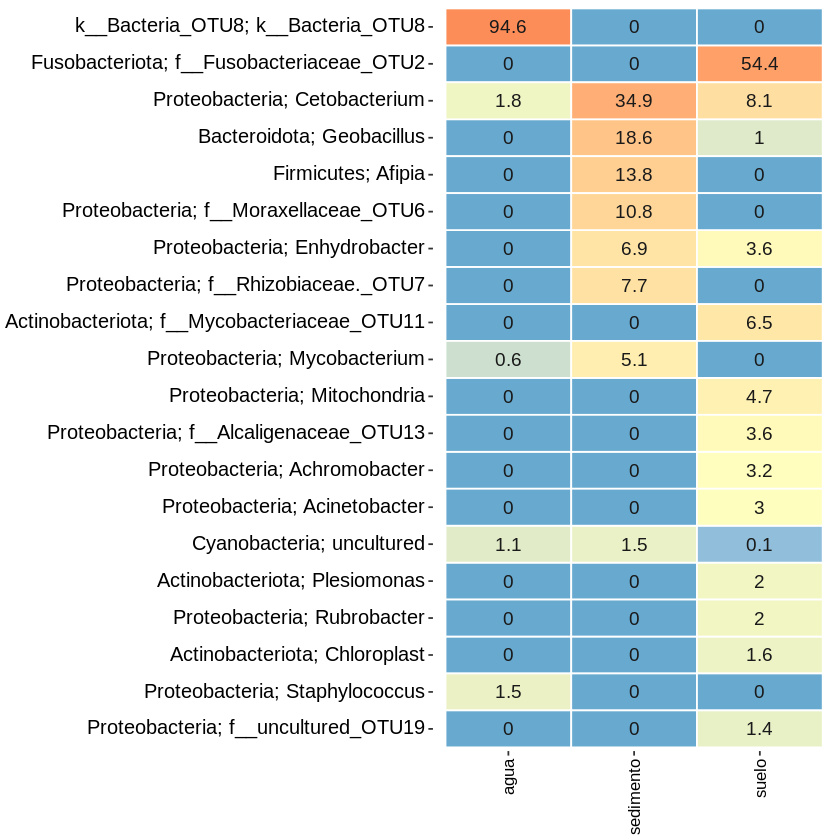

In [ ]:
amp_heatmap(data = SOLARIA, group_by = "TypeSample", tax_show = 20, tax_aggregate = "Genus", tax_add = "Phylum")

 ### Importancia de los mapas de calor:

Los mapas de calor son considerados una herramienta útil porque puede proporcionar una descripción general completa, ya que sus herramientas de visualización de datos son fáciles de entender y, a menudo, se explican por sí mismas.

#Diagrama de Venn

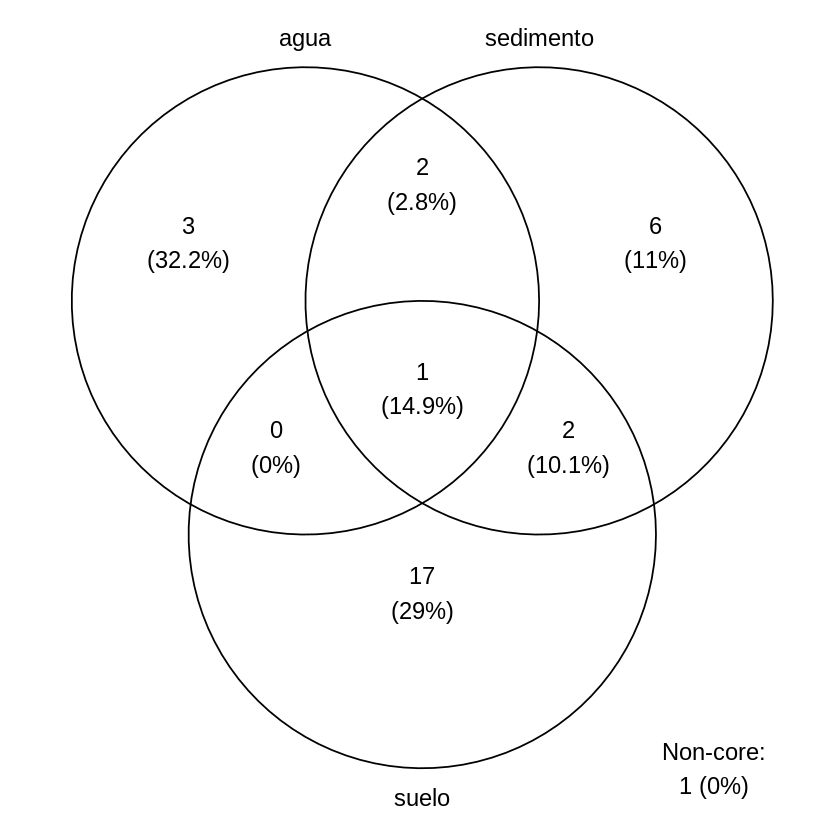

In [ ]:
amp_venn(data = SOLARIA, group_by = "TypeSample", cut_f = 95)

Los diagramas de Venn calculan la cantidad de OTUs compartidos por grupos dados los umbrales sobre la frecuencia con la que las OTUs deben estar por encima de cierta abundancia. También devuelve la abundancia promedio de las OTUs en un grupo en particular.